In [15]:
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage
from typing import Annotated
from IPython.display import Image,display

In [16]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [17]:
llm=ChatGroq(model="qwen-2.5-32b")

In [18]:
class State(TypedDict):
    transcript : str
    summary : str
    action_items : str
    follow_email : str
    messages:Annotated[list,add_messages]

In [19]:
def summarize(state):
    """"
    LLM takes input as transcript and summarize the convert raw transcript
    
    """
    summary=llm.invoke(f"Generate summary based on {state['transcript']}")
    return {summary.content()}

In [20]:
#Building graph:
graph=StateGraph(State)

#Adding node:
graph.add_node("Summary",summarize)

#Adding edge:
graph.add_edge(START,"Summary")
graph.add_edge("Summary",END)

app=graph.compile()

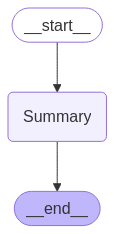

In [21]:

display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
inputs={"transcript": "Alice: We need the report done by Friday. Bob: I'll schedule sprint planning for Monday..."}
result=app.invoke(inputs)
print("Meeting Summary:\n", result["summary"])

TypeError: 'str' object is not callable